In [1]:
import ROOT 
ROOT.gInterpreter.AddIncludePath(("/home/pagroup/shahina/codes/dragon_analyzer/src"))
ROOT.gSystem.Load("/home/pagroup/shahina/codes/dragon_analyzer/lib/libDragon.so")

Error in <TApplication::ExecuteFile>: macro /NPLib/scripts/NPToolLogon.C not found in path .:/opt/new/share/root/macros


0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from ROOT import TCanvas, TCut, TH1F, TFile, TChain

In [4]:
# Create a new canvas
c1 = ROOT.TCanvas("c1", "c1", 800, 800)

# Define run range and initialize list of runs
firstRun = 9070
lastRun = 9079
runs = []

# Fill the runs list, excluding specific runs
for i in range(firstRun, lastRun + 1):
    if i == 9140 or i == 9141:
        continue
    runs.append(i)

In [5]:
runs

[9070, 9071, 9072, 9073, 9074, 9075, 9076, 9077, 9078, 9079]

In [6]:
# Define the file format and create the TChain
format_str = "/data/pagroup/pa02/S1805/local_root_attempt/run{}.root"
t5 = ROOT.TChain("t5")
for run in runs:
    t5.Add(format_str.format(run))

In [7]:
# Set aliases
t5.SetAlias("h", "head")
t5.SetAlias("t", "tail")

True

In [8]:
# Define cuts
pulse = "!(t.io32.trigger_latch & 128) && !(xtofh==-1)"
septof = "xtofh > 2100 && xtofh < 2300"
mcptof = "t.tof.mcp > 124 && t.tof.mcp < 133"
bgo0 = "h.bgo.esort[0] > 1.25 && h.bgo.esort[0] < 12.0"
dsssdhit = "t.dsssd.efront > 0.0 && t.dsssd.efront < 4000.0"
dsssdcut = "t.dsssd.efront > 0.0 && t.dsssd.efront < 4000.0"
bckgnd0 = "xtofh > 1300 && xtofh < 1600"
bckgnd1 = "xtofh > 1600 && xtofh < 1900"
bckgnd2 = "xtofh > 1900 && xtofh < 2200"
bckgnd4 = "xtofh > 2500 && xtofh < 2800"
bckgnd5 = "xtofh > 3200 && xtofh < 3500"
bckgnd6 = "xtofh > 3500 && xtofh < 3800"
bckgnd7 = "xtofh > 3800 && xtofh < 4100"
bckgnd8 = "xtofh > 4100 && xtofh < 4400"
bckgnd9 = "xtofh > 4400 && xtofh < 4700"

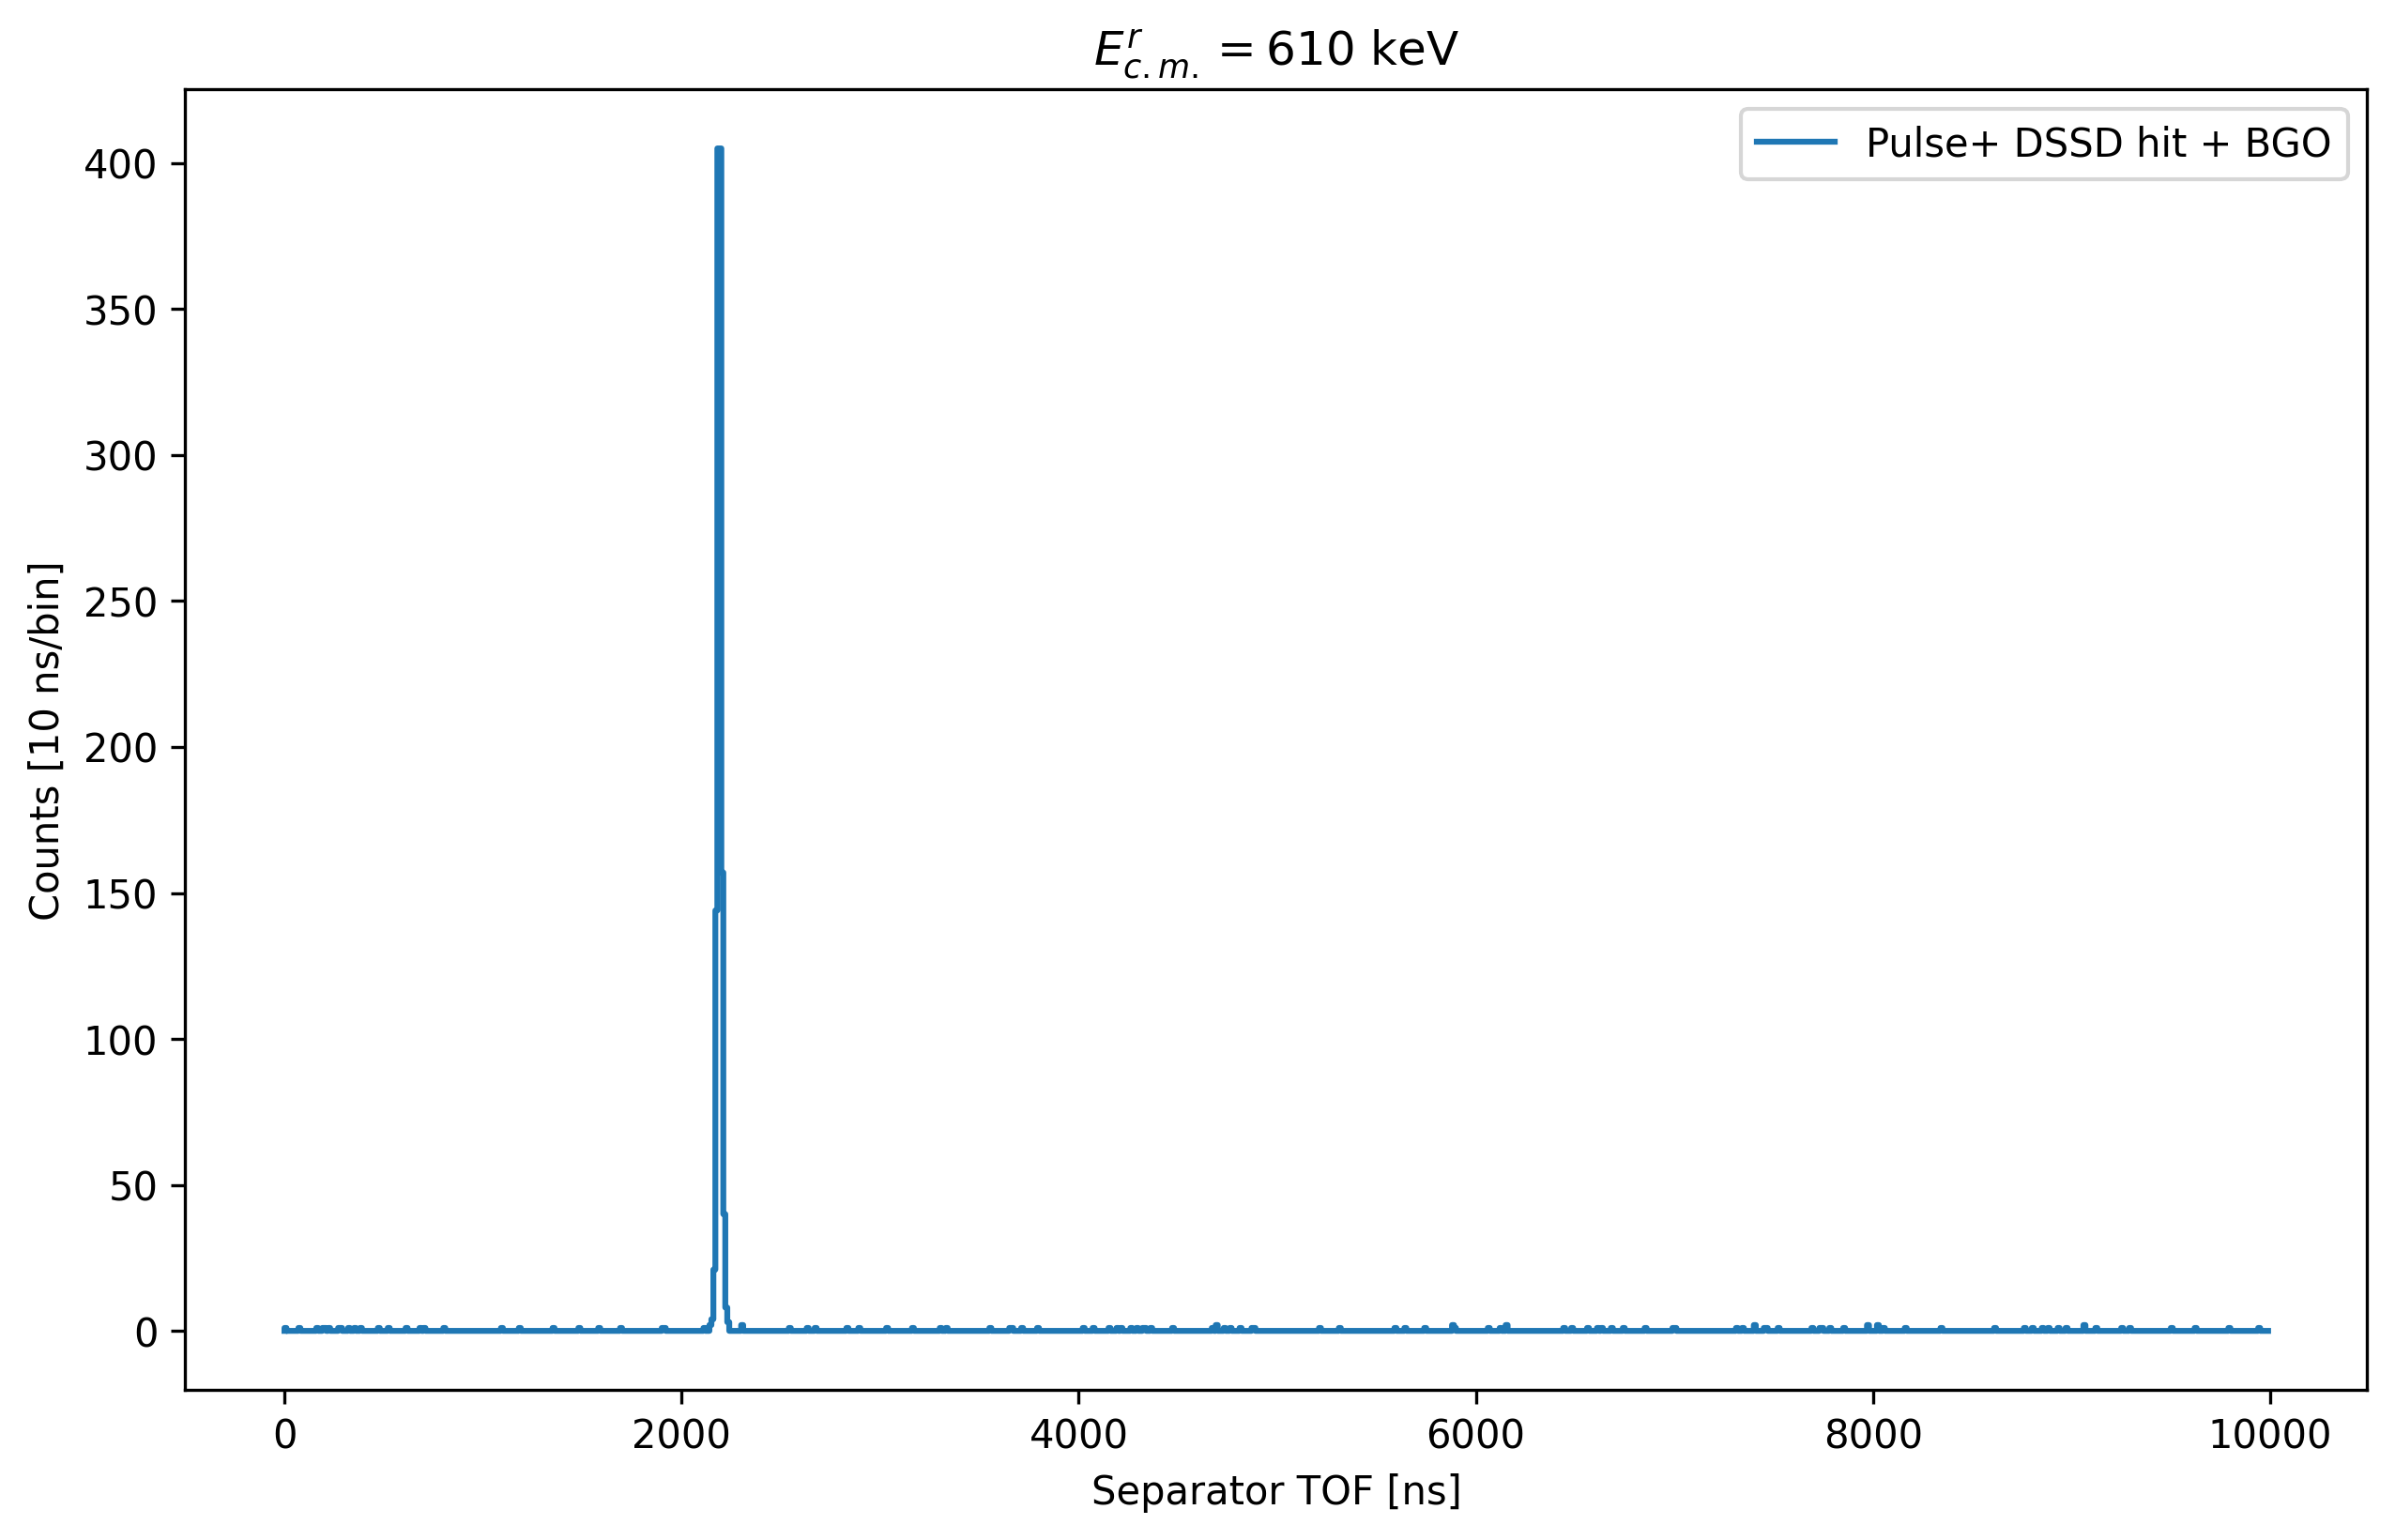

In [9]:
# Create and draw histograms
h_septof = ROOT.TH1F("h_septof", "E^{r}_{c.m.} = 610 keV", 1000, 0, 10000)
t5.Draw("xtofh >> h_septof", pulse + " && " + dsssdhit + " && " + bgo0)
# Get the histogram from ROOT
h_septof = ROOT.gDirectory.Get("h_septof")


# Convert the histogram to NumPy arrays
n_bins = h_septof.GetNbinsX()
x_edges = np.array([h_septof.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values = np.array([h_septof.GetBinContent(i) for i in range(1, n_bins + 1)])

# Create the step plot using Matplotlib
plt.figure(figsize=(10, 6),dpi=300)

plt.step(x_edges[:-1], y_values,label="Pulse+ DSSD hit + BGO")

# Add labels and title
plt.xlabel('Separator TOF [ns]')
plt.ylabel('Counts [10 ns/bin]')
plt.title(r'$E^{r}_{c.m.} = 610 \text{ keV}$')
plt.legend()


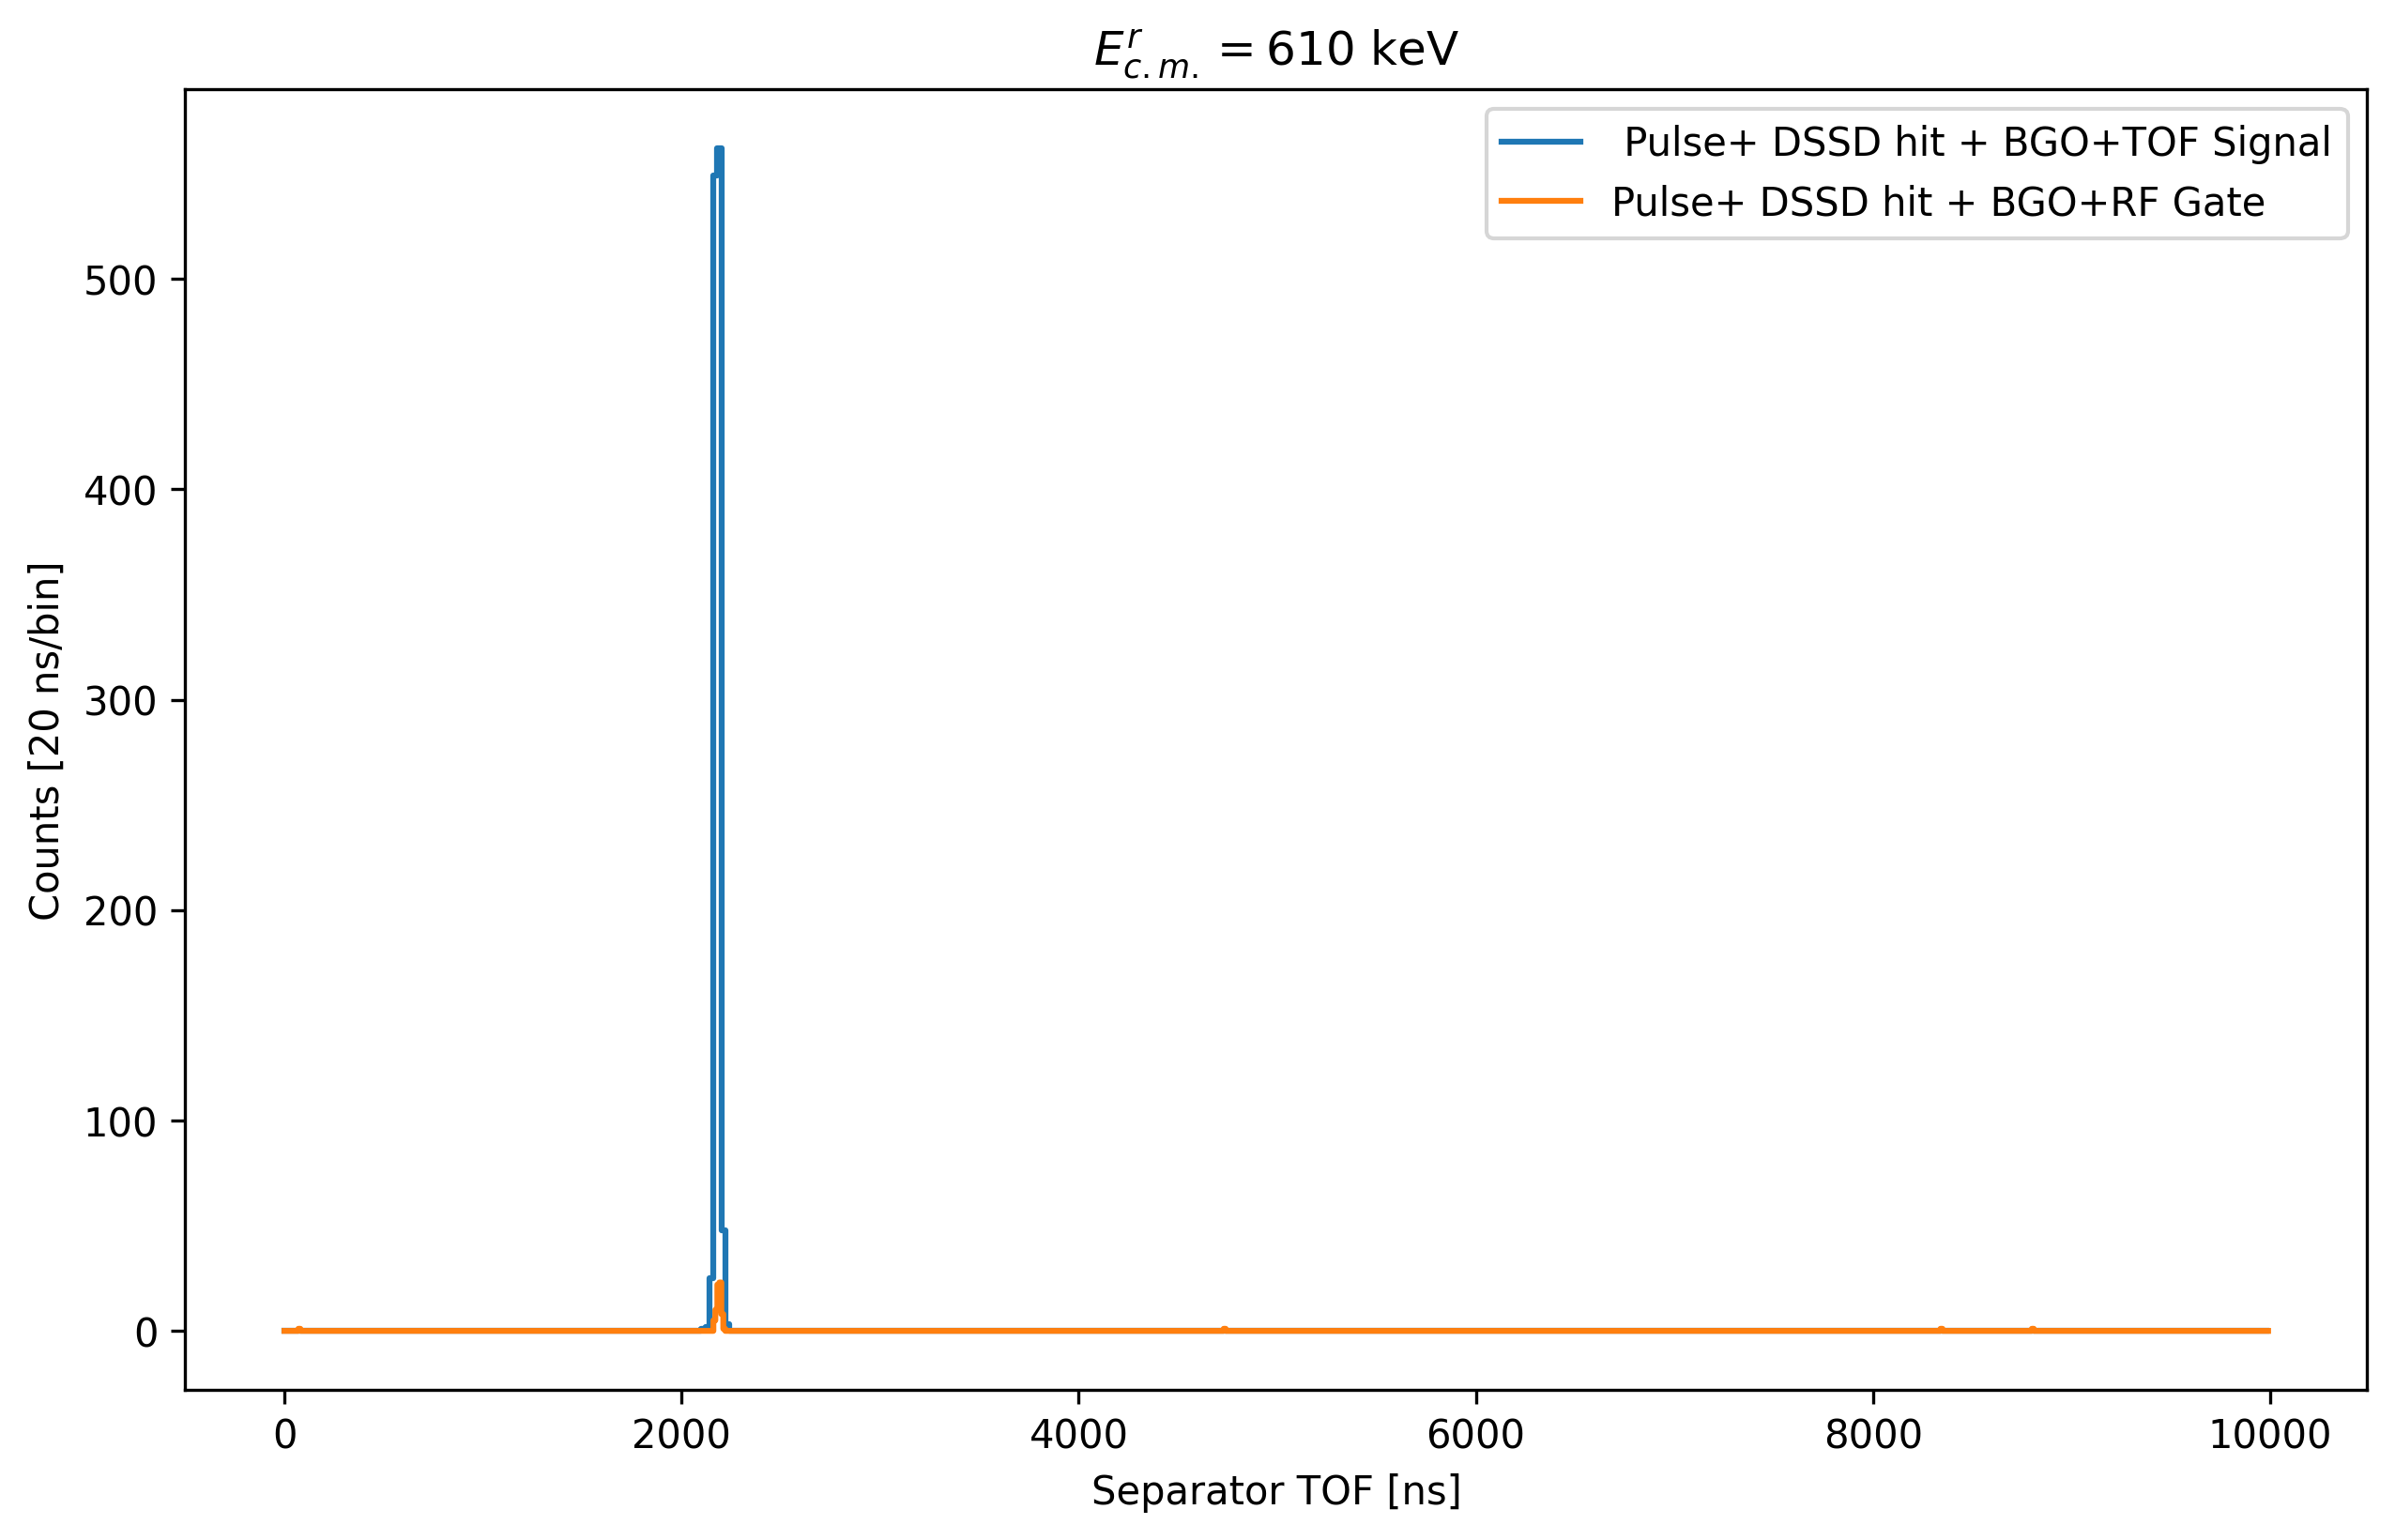

In [10]:


h_septof_signal = TH1F("h_septof_signal", " ", 500, 0, 10000)
t5.Draw("xtofh >> h_septof_signal", pulse + " && " + dsssdhit + " && " + septof + " && " + bgo0, "goff")

h_septof_signal  = ROOT.gDirectory.Get("h_septof_signal")

# Convert the histogram to NumPy arrays
n_bins = h_septof_signal.GetNbinsX()
x_edges = np.array([h_septof_signal.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values = np.array([h_septof_signal.GetBinContent(i) for i in range(1, n_bins + 1)])

# Create the step plot using Matplotlib
plt.figure(figsize=(10, 6),dpi=300)

plt.step(x_edges[:-1], y_values,label=" Pulse+ DSSD hit + BGO+TOF Signal")

# Add labels and title
plt.xlabel('Separator TOF [ns]')
plt.ylabel('Counts [20 ns/bin]')
plt.title(r'$E^{r}_{c.m.} = 610 \text{ keV}$')

h_septof_RFGate = TH1F("h_septof_RFGate", "E^{r}_{c.m.} = 610 keV", 1000, 0, 10000)
t5.Draw("xtofh >> h_septof_RFGate", pulse + " && " + dsssdhit + " && " + bgo0 + " && head.tcal_rf > 10220 && head.tcal_rf < 10240", "goff")

h_septof_RFGate  = ROOT.gDirectory.Get("h_septof_RFGate")

# Convert the histogram to NumPy arrays
n_bins = h_septof_RFGate.GetNbinsX()
x_edges_RFGate = np.array([h_septof_RFGate.GetBinLowEdge(i) for i in range(1, n_bins + 2)])
y_values_RFGate = np.array([h_septof_RFGate.GetBinContent(i) for i in range(1, n_bins + 1)])

plt.step(x_edges_RFGate[:-1], y_values_RFGate,label="Pulse+ DSSD hit + BGO+RF Gate")

plt.legend()



In [11]:
# Draw background gated histogram
#h_septof_RFGate = ROOT.TH1F("h_septof_RFGate", "E^{r}_{c.m.} = 610 keV", 1000, 0, 10000)
#t5.Draw("xtofh >> h_septof_RFGate", pulse + " && " + dsssdhit + " && " + bgo0 + " && head.tcal_rf > 10200 && head.tcal_rf < 10290", "goff")
#h_septof_RFGate.SetLineColor(ROOT.kRed)
#h_septof_RFGate.Draw("same")

In [12]:
# Print the signal integral
signal_bin_low = h_septof.FindBin(2140)
signal_bin_high = h_septof.FindBin(2260)
signal = h_septof.Integral(signal_bin_low, signal_bin_high)
print(f"signal = {signal}")


signal = 1189.0


In [13]:
# Background calculation
backgroundLow = [1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2300, 2400]
backgroundWidth = 120


In [14]:
background_sum = 0
for i in range(len(backgroundLow)):
    bin_low = h_septof.FindBin(backgroundLow[i])
    bin_high = h_septof.FindBin(backgroundLow[i] + backgroundWidth)
    background = h_septof.Integral(bin_low, bin_high)
    print(f"Background {i} = {background}")
    background_sum += background


Background 0 = 1.0
Background 1 = 1.0
Background 2 = 1.0
Background 3 = 1.0
Background 4 = 1.0
Background 5 = 2.0
Background 6 = 2.0
Background 7 = 1.0
Background 8 = 2.0
Background 9 = 0.0


background = 1.2


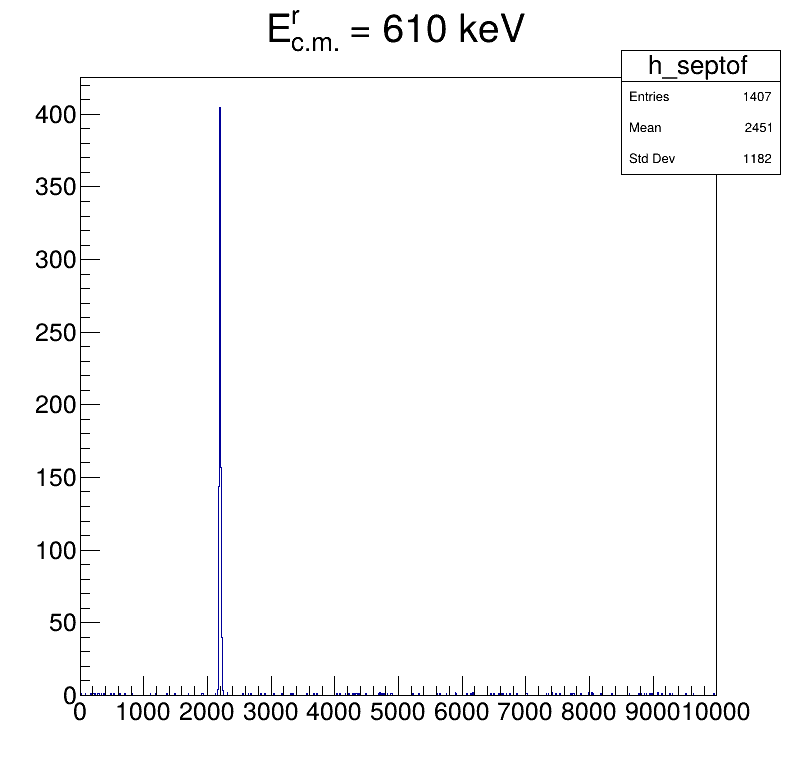

In [15]:
background_mean = background_sum / len(backgroundLow)
print(f"background = {background_mean}")

# Update canvas and show
c1.Update()
c1.Draw()